In [14]:
from qiskit import *
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import numpy as np
from qiskit_aer import Aer

In [ ]:
# z measurement for qubit-0
q_reg = QuantumRegister(1, 'q')
c_reg = ClassicalRegister(1, 'c')

measure_z = QuantumCircuit(q_reg, c_reg)
measure_z.measure(q_reg, c_reg)

# x measurement for qubit-0
measure_x = QuantumCircuit(q_reg, c_reg)
measure_x.h(q_reg)

measure_x.measure(q_reg, c_reg)


z measurement usually gives zero if we do nothing but a measurement and it is certain to come as 0. it is |0>, 0 is the name of the state of qubit which is 0. the zero inside the ket can be anything but for easy notation we use 0

Ket(|>), its just a column representing a qubit state 

like |0> there is |1> too just to make it easier for notation


lly <0| and <1| are row vectors 

this is called bra(<|) ket(|>) notation or Dirac notation

inner product of any vector with itself is 1 (Normalization Condition)

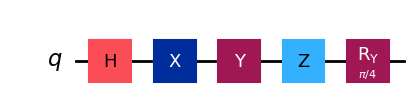

In [13]:
qc = QuantumCircuit(q_reg)
qc.h(q_reg)
qc.x(q_reg)
qc.y(q_reg)
qc.z(q_reg)

theta = np.pi/4
qc.ry(theta, q_reg) # y axis rotation
qc.draw(output = 'mpl')

In [67]:
shots = 2**14

uncertainity = 0
for measure_circuit in [measure_z, measure_x]:
    result = Aer.get_backend('qasm_simulator').run(measure_circuit, shots=shots).result()
    counts = result.get_counts(measure_circuit)
    probs = {}
    for output in ['0', '1']:
        if output in counts:
            probs[output] = counts[output] / shots
        else:
            probs[output] = 0
    uncertainity += (probs.get('0', 0) - probs.get('1', 0))**2
print(uncertainity)

1.0000250488519669


What is (probs['0'] - probs['1'])? 

For a single qubit: 

    probs['0'] + probs['1'] = 1
    So: probs['0'] - probs['1'] = 2*probs['0'] - 1 = expectation value of Pauli Z (or X)
     

Let’s define: 

    For Z measurement: ⟨Z⟩ = P(0) - P(1)
    For X measurement: ⟨X⟩ = P(0) - P(1) in X-basis
     

uncertainity = ⟨Z⟩² + ⟨X⟩²

Now, for a qubit state, what is the maximum of ⟨Z⟩² + ⟨X⟩²? 

Recall: For a single qubit, the Bloch vector has components: 

    ⟨X⟩² + ⟨Y⟩² + ⟨Z⟩² ≤ 1 (equality for pure states)
     

So: 

    ⟨Z⟩² + ⟨X⟩² ≤ 1
     

Wait — that suggests it should not exceed 1! 

But here's the catch: Are you measuring the same qubit in both bases, on the same state? 

For a single qubit measurement: 

    If you measure in the Z basis: 
        P(0) = probability of outcome |0⟩
        P(1) = probability of outcome |1⟩

        The expectation value of Z is:  
        ⟨Z⟩=(+1)⋅P(0)+(−1)⋅P(1)=P(0)−P(1) 
         

    Similarly, in the X basis: 
        P(0) = probability of outcome |+⟩
        P(1) = probability of outcome |-⟩
         
        ⟨X⟩=P(0)−P(1)(in X-basis) 
         
     